# Most Visited Monopoly Properties

---

## Import packages

In [24]:
# JSON manipulation
import json

# Randomization
import random

# Count unique values
from collections import Counter

# Matrices manipulation
import numpy as np

# Data frame manipulation
import pandas as pd

# Data viz
from plotnine import *
import plotnine

In [25]:
# Warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Simulation of rolling dices

In [26]:
# Data object
obj = {
    'dices': {},
    'data': []
}

# Number of iteration
num_iter = 100000

for iter_ in range(num_iter):
    # Roll the dices
    dices = random.choices(population = range(1, 7), k = 2)
    # Update the data object - dictionary
    obj['dices'].update(
        {
            iter_: dices
        }
    )
    
    # Update the data object - list
    obj['data'].append(np.sum(dices))

In [27]:
# Data frame
df_dices = pd.DataFrame(
    data = Counter(obj['data']).items(),
    columns = [
        'Sum of Dices',
        'Occurrences'
    ]
).sort_values(
    by = [
        'Sum of Dices'
    ]
).reset_index(
    drop = True
)

# Calculate the probability
df_dices['Probability'] = (
    df_dices['Occurrences'] / df_dices['Occurrences'].sum()
)


In [28]:
# Show the data
df_dices.head(20)

,Sum of Dices,Occurrences,Probability
0,2,2843,0.02843
1,3,5517,0.05517
2,4,8447,0.08447
3,5,10922,0.10922
4,6,13811,0.13811
5,7,16555,0.16555
6,8,13824,0.13824
7,9,11236,0.11236
8,10,8336,0.08336
9,11,5711,0.05711


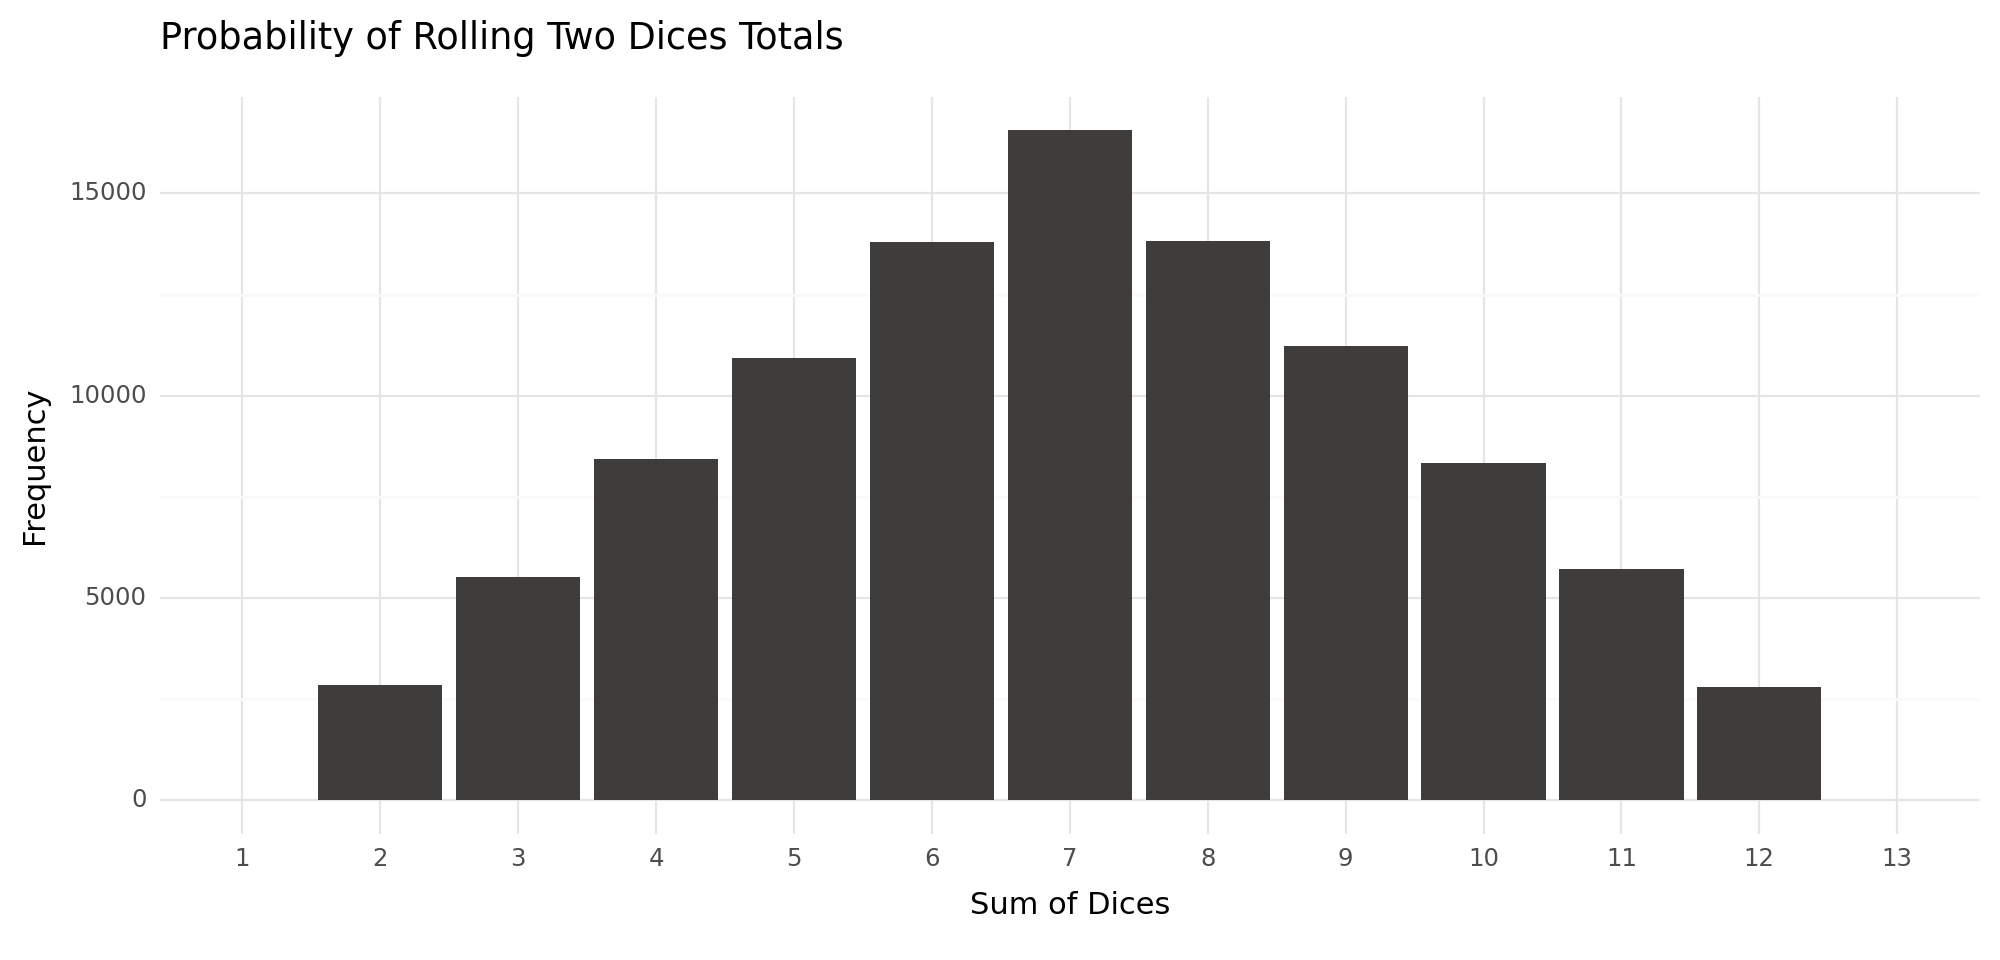

<Figure Size: (1000 x 480)>

In [29]:
# Data viz
plotnine.options.figure_size = (10, 4.8)
(
    ggplot(data = df_dices)+
    geom_bar(aes(x = 'Sum of Dices',
                 y = 'Occurrences'),
             fill = '#3F3D3B',
             stat = 'identity')+
    labs(title = 'Probability of Rolling Two Dices Totals')+
    xlab('Sum of Dices')+
    ylab('Frequency')+
    scale_x_discrete(limits = [str(i) for i in range(1, 14)])+
    theme_minimal()
)

## Load the data

### The `chance` and `community chest`

In [30]:
# Open JSON file
card = open('data\chance_community_card.json')
# Returns JSON object as a dictionary
data_card = json.load(card)

In [31]:
# Chance and community cards
data_card['chance_card']

[{'number': 1,
  'narration': 'Advance to Go (Collect Â£200)',
  'action': 'move_money',
  'asset': None,
  'money': {'amount': 200,
   'cash_in': True,
   'requisite': {'status': False, 'condition': None}},
  'move': {'properties': 1, 'forward': False, 'step': None}},
 {'number': 2,
  'narration': 'Advance to Trafalgar Square. If you pass Go, collect Â£200',
  'action': 'move_money',
  'asset': None,
  'money': {'amount': 200,
   'cash_in': True,
   'requisite': {'status': True, 'condition': 'pass_go'}},
  'move': {'properties': 25, 'forward': False, 'step': None}},
 {'number': 3,
  'narration': 'Advance to Mayfair',
  'action': 'move',
  'asset': None,
  'money': {'amount': 0,
   'cash': None,
   'requisite': {'status': False, 'condition': None}},
  'move': {'properties': 40, 'forward': False, 'step': None}},
 {'number': 4,
  'narration': 'Advance to Pall Mall. If you pass Go, collect Â£200',
  'action': 'move_money',
  'asset': None,
  'money': {'amount': 200,
   'cash_in': True,
  

### The `spaces`

In [32]:
# Open JSON file
space = open('data\\board_spaces.json')
# Returns JSON object as a dictionary
data_space = json.load(space)

In [33]:
# Spaces
data_space

[{'order': 1,
  'name': 'Go',
  'space_type': 'corner_square',
  'color': 'white',
  'money': {'amount': 200, 'cash_in': True}},
 {'order': 2,
  'name': 'Old Kent Road',
  'space_type': 'road',
  'color': 'brown',
  'money': {'amount': 60, 'cash_in': False},
  'rent': {'alone': 2,
   'monopoly': 4,
   'with_house': {'house_1': 10,
    'house_2': 30,
    'house_3': 90,
    'house_4': 160,
    'hotel': 250}},
  'prices': {'printed_price': 60, 'mortgage_value': 30, 'building_costs': 50}},
 {'order': 3,
  'name': 'Community Chest',
  'space_type': 'community_chest',
  'color': 'white',
  'money': {'amount': 0, 'cash_in': False}},
 {'order': 4,
  'name': 'Whitechapel Road',
  'space_type': 'road',
  'color': 'brown',
  'money': {'amount': 60, 'cash_in': False},
  'rent': {'alone': 4,
   'monopoly': 8,
   'with_house': {'house_1': 20,
    'house_2': 60,
    'house_3': 180,
    'house_4': 320,
    'hotel': 450}},
  'prices': {'printed_price': 60, 'mortgage_value': 30, 'building_costs': 50}},


## Take `chance` and `community chest` cards

### Functions for taking a card

In [34]:
# Update spaces
def update_space(
    last_move: int,
    dices: list,
    data_space: dict
    ):
    # Updated board based latest move
    l_board = (data_space[last_move - 1:] + data_space[:last_move - 1])
    # Current space
    d_current_space = [l_board[np.sum(dices) % len(l_board)]]
    
    return d_current_space

In [35]:
# Find the shortest spaces in circular list
def distance_space(
    data_space: dict,
    first_index: int,
    second_index: int
    ):
    # Update the data space
    data_space_update = (data_space[first_index - 1:] + data_space[:first_index - 1])
    
    # Calculate the distance
    distance = next((index for (index, dict_) in enumerate(data_space_update) if dict_['order'] == second_index), None)
    
    return distance

In [36]:
# Find the shortest spaces for spaces in circular list
def shortest_space(
    source: int,
    targets: list,
    data_space: dict
    ):
    # Create a dictionary
    d_targets = {key: None for key in targets}
    
    # Loop the targets
    for target in d_targets.keys():
        # Calculate the minimum distance
        shortest = distance_space(
            data_space = data_space,
            first_index = source,
            second_index = target
        )
        
        # Update the dictionary
        d_targets.update(
            {
                target: shortest
            }
        )
        
    # Get the best space
    space = min(d_targets, key = d_targets.get)

    # Forward-backward status
    forward_status = True
    
    return (space, forward_status)

In [37]:
def draw_and_process_card(
    game_state: dict,
    use_card: bool,
    is_chance_card: bool,
    card_data: dict,
    board_data: dict,
) -> dict:
    """
    Draws a card (either chance or community chest) from the deck, processes its action, 
    and updates the game state accordingly.

    Parameters:
    - game_state (dict): Current state of the game.
    - use_card (bool): Flag indicating if the drawn card should be used or not.
    - is_chance_card (bool): Flag indicating if the card to be drawn is a chance card.
    - card_data (dict): Data regarding available cards.
    - board_data (dict): Data representing the board's spaces.

    Returns:
    - dict: Updated game state.
    """
    
    card_type = "community_card" if not is_chance_card else "chance_card"
    selected_card = random.choice(card_data[card_type])
    
    game_state["move"][card_type] = selected_card["number"]
    
    if use_card:
        if selected_card["action"] in ["move", "move_money"]:
            current_space = game_state["move"]["after"]["updated"] or game_state["move"]["after"]["real"]
            
            if selected_card["move"]["properties"] is None:
                step_multiplier = 1 if selected_card["move"]["forward"] else -1
                new_space = update_space(
                    last_move=current_space,
                    dices=(step_multiplier * selected_card["move"]["step"]),
                    data_space=board_data,
                )[0]
                game_state["move"]["after"]["updated"] = new_space["order"]
                game_state["move"]["forward"]["updated"] = selected_card["move"]["forward"]
                
            else:
                property_target = selected_card["move"]["properties"]
                
                if property_target in [998, 999]:
                    target_spaces = {998: [13, 29], 999: [6, 16, 26, 36]}
                    nearest_property, forward_direction = find_shortest_distance_to_targets(
                        start_space=current_space,
                        target_spaces=target_spaces[property_target],
                        board_data=board_data,
                    )
                    game_state["move"]["after"]["updated"] = nearest_property
                    game_state["move"]["forward"]["updated"] = forward_direction
                    
                else:
                    game_state["move"]["after"]["updated"] = property_target
                    game_state["move"]["forward"]["updated"] = True

    return game_state


### Simulation

In [38]:
# Sample data
sample = {
    'subiteration': 1,
    'dices': [2, 3],
    'move': {
        'chance_card': None,
        'community_card': None,
        'jail': {
            'status': False,
            'number': 0
        },
        'before': 30,
        'after': {
            'real': 31,
            'updated': None
        },
        'forward': {
            'real': None,
            'updated': None
        }
    }
}

In [39]:
# Simulation
draw_and_process_card(
    subiteration_dict = sample,
    card = False,
    chance_card = True,
    data_card = data_card,
    data_space = data_space
)

{'subiteration': 1,
 'dices': [2, 3],
 'move': {'chance_card': 7,
  'community_card': None,
  'jail': {'status': False, 'number': 0},
  'before': 30,
  'after': {'real': 31, 'updated': None},
  'forward': {'real': None, 'updated': None}}}

## Players movement

### Functions for movement

In [40]:
# Rounds on Monopoly board
def round_spaces(
    dict_spaces: dict
    ):
    # Latest round
    latest_round = dict_spaces['round']
    
    # Update status
    updated_status = False
    # After-before spaces
    before = dict_spaces['move']['before']
    after = dict_spaces['move']['after']['real']
    if dict_spaces['move']['after']['updated'] != None:
        after = dict_spaces['move']['after']['updated']
        updated_status = True
    
    # Create a list
    l = list(range(before, after))
    # Dice roll
    dices_roll = abs(before - after)
    
    # Jail status
    jail_status = dict_spaces['move']['jail']['status']
    # Chance card
    chance_card = dict_spaces['move']['chance_card']
    # Community chest card
    community_card = dict_spaces['move']['community_card']
    
    # If player(s) is on a 'Jail'
    if jail_status == False:
        if (chance_card != None) and (community_card != None):
            # Check condition
            if len(l) == 0:
                # Move forward
                if dices_roll > 12:
                    dict_spaces['round'] += 1
                # Stay
                else:
                    pass
            else:
                # Move backward
                if dices_roll > 12:
                    dict_spaces['round'] -= 1
                # Stay
                else:
                    pass
        else:
            if (chance_card != None):
                pass
    else:
        pass
    
    return dict_spaces

In [41]:
def move_spaces(
    dict_latest: dict,
    dices: int,
    subiteration: int,
    three_times: bool,
    card: bool,
    data_card: dict,
    data_space: dict
    ):

    # Template of players' iteration
    template_iter = {
        'subiteration': subiteration,
        'dices': dices,
        'move': {
            'chance_card': None,
            'community_card': None,
            'jail': {
                'status': False,
                'number': 0
            },
            'before': dict_latest['move']['after']['real'] or dict_latest['move']['after']['updated'],
            'after': {
                'real': None,
                'updated': None
            },
            'forward': {
                'real': True,
                'updated': None
            }
        }
    }

    # Extract relevant data from latest dict
    jail_status, jail_trial = dict_latest['move']['jail'].values()
    last_move = template_iter['move']['before']

    # Handle Jail logic
    if jail_status:
        if len(set(dices)) != 1 and jail_trial < 2:
            template_iter['move']['jail']['number'] = jail_trial + 1
        else:
            d_current_space = update_space(last_move, dices, data_space)
            template_iter['move']['after']['real'] = d_current_space[0]['order']

    # Handle three times doubles logic
    elif three_times:
        template_iter['move']['jail']['status'] = True
        template_iter['move']['after']['real'] = 11
        template_iter['move']['forward']['real'] = False

    # Handle regular move
    else:
        d_current_space = update_space(last_move, dices, data_space)
        template_iter['move']['after']['real'] = d_current_space[0]['order']

        # Handle Go to Jail space
        if d_current_space[0]['order'] == 31:
            template_iter['move']['jail']['status'] = True
            template_iter['move']['after']['updated'] = 11
            template_iter['move']['forward']['updated'] = False

        # Handle cards spaces
        elif d_current_space[0]['space_type'] == 'community_chest':
            template_iter = take_cards(template_iter, card, False, data_card, data_space)
        elif d_current_space[0]['space_type'] == 'chance':
            template_iter = take_cards(template_iter, card, True, data_card, data_space)

    return template_iter


### Simulation

In [42]:
# Sample data
sample = {
    'subiteration': 1,
    'dices': [2, 3],
    'move': {
        'chance_card': None,
        'community_card': None,
        'jail': {
            'status': False,
            'number': 0
        },
        'before': 30,
        'after': {
            'real': 35,
            'updated': None
        },
        'forward': {
            'real': None,
            'updated': None
        }
    }
}

In [53]:
# Simulation
move_spaces(
    dict_latest = sample,
    dices = [7, 6],
    subiteration = 6,
    three_times = False,
    card = True,
    data_card = data_card,
    data_space = data_space
)

{'subiteration': 6,
 'dices': [7, 6],
 'move': {'chance_card': 14,
  'community_card': None,
  'jail': {'status': False, 'number': 0},
  'before': 35,
  'after': {'real': 8, 'updated': 6},
  'forward': {'real': True, 'updated': True}}}

## Core simulation

In [44]:
# Monopoly simulation
def monopoly_simulation(
    num_player: int,
    iteration: int,
    card: bool
    ):
    # String of players
    player_str = ['Player ' + str(i) for i in range(1, num_player + 1)]
    
    # A dictionary for players
    obj = {
        'players': num_player,
        'iteration': iteration,
        'simulation': dict([(idx, dict([('iterations', [])])) for idx in player_str])
    }
    
    # Loop for iterations
    for turn in range(iteration):
        # Loop for players
        for player in player_str:
            # Length of iterations in each player
            length_iter = len(obj['simulation'][player]['iterations'])
            
            if turn == 0:
                # Initial move
                d_last_move = {
                    'subiteration': 0,
                    'dices': [0, 0],
                    'move': {
                        'chance_card': None,
                        'community_card': None,
                        'jail': {
                            'status': False,
                            'number': 0
                        },
                        'before': 1,
                        'after': {
                            'real': 1,
                            'updated': None
                        }
                    }
                }
            else:
                # Check latest move
                d_last_move = obj['simulation'][player]['iterations'][-1]['data'][-1]
            
            # CORE ALGORITHM
            # Template for subiteration
            subiteration_temp = {'iteration': turn, 'data': [d_last_move]}
            # Roll the dices
            dices = random.choices(population = range(1, 7), k = 2)
            # Subiteration
            loop = 1

            # While loop
            while (len(np.unique(dices)) == 1) and (loop < 3):
                # Get the subiteration
                subiteration_data = move_spaces(
                    dict_latest = subiteration_temp['data'][-1],
                    dices = dices,
                    subiteration = loop,
                    three_times = False,
                    card = card,
                    data_card = data_card,
                    data_space = data_space
                )

                # Append the subiteration data
                subiteration_temp['data'].append(subiteration_data)

                # Update the indexer
                dices = random.choices(population = range(1, 7), k = 2)
                loop += 1
            
            else:
                # If same numbers are found three times
                if (len(np.unique(dices)) == 1) and (loop > 2):
                    three_times = True
                # Next move
                else:
                    three_times = False
                
                # Get the subiteration
                subiteration_data = move_spaces(
                    dict_latest = subiteration_temp['data'][-1],
                    dices = dices,
                    subiteration = loop,
                    three_times = three_times,
                    card = card,
                    data_card = data_card,
                    data_space = data_space
                )

                # Append the subiteration data
                subiteration_temp['data'].append(subiteration_data)
            
            # Remove first element in data of 'subiteration_temp'
            subiteration_temp['data'] = subiteration_temp['data'][1:]
            
            # Append the obj
            obj['simulation'][player]['iterations'].append(subiteration_temp)
    
    return obj

### Convert JSON into data frame

In [45]:
# Flatten the JSON
def flatten_json(
    d: dict
    ):
    # Normalize JSON into data frame
    f = pd.json_normalize(d, sep = '_')
    # Data frame into JSON
    result_json = f.to_dict(orient = 'records')[0]
    
    return result_json

### Simulation 1 `(many players, one round)`

In [46]:
# Parameters
num_player = 5
iteration = 20000

# Simulation
data_simulation = monopoly_simulation(
    num_player = num_player,
    iteration = iteration,
    card = True
)

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [ ]:
# Show the data
data_simulation

{'players': 5,
 'iteration': 20000,
 'simulation': {'Player 1': {'iterations': [{'iteration': 0,
     'data': [{'subiteration': 1,
       'dices': [6, 4],
       'move': {'chance_card': None,
        'community_card': None,
        'jail': {'status': False, 'number': 0},
        'before': 1,
        'after': {'real': 11, 'updated': None},
        'forward': {'real': True, 'updated': None}}}]},
    {'iteration': 1,
     'data': [{'subiteration': 1,
       'dices': [6, 6],
       'move': {'chance_card': 8,
        'community_card': None,
        'jail': {'status': False, 'number': 0},
        'before': 11,
        'after': {'real': 23, 'updated': None},
        'forward': {'real': True, 'updated': None}}},
      {'subiteration': 2,
       'dices': [3, 4],
       'move': {'chance_card': None,
        'community_card': None,
        'jail': {'status': False, 'number': 0},
        'before': 23,
        'after': {'real': 30, 'updated': None},
        'forward': {'real': True, 'updated': None

In [ ]:
# Flatten full dictionary object
def flatten_obj(
    data_simulation: dict,
    round_iter: int
    ):
    # Players
    players = data_simulation['simulation'].keys()

    # Object to store data
    obj_simulation = []

    # Loop the players
    for player in players:
        # Number of iteration
        data_iterations = data_simulation['simulation'][player]['iterations']

        # Loop the iteration
        for iter_ in range(len(data_iterations)):
            # Selected iteration
            selected_iteration = data_iterations[iter_]
            # Iteration
            n_iteration = selected_iteration['iteration']

            # Loop the subiteration
            for subiter_ in range(len(selected_iteration['data'])):
                # Selected subiteration
                selected_subiteration = selected_iteration['data'][subiter_]
                # Flatten the JSON
                subiteration_reformat = flatten_json(selected_subiteration)
                # Add iteration, player, and round
                new_data = {**{'player': player, 'round': round_iter, 'iteration': n_iteration}, **subiteration_reformat}

                # Append into data object
                obj_simulation.append(new_data)
    
    return obj_simulation

In [ ]:
# Flatten the data
obj_simulation = flatten_obj(
    data_simulation = data_simulation,
    round_iter = None
)

In [ ]:
# Data frame
df = pd.DataFrame(
    data = obj_simulation
)

In [ ]:
# Show the data
df.head(50)

,player,round,iteration,subiteration,dices,move_chance_card,move_community_card,move_jail_status,move_jail_number,move_before,move_after_real,move_after_updated,move_forward_real,move_forward_updated
0,Player 1,None,0,1,"[6, 4]",NaN,NaN,False,0,1,11,NaN,True,None
1,Player 1,None,1,1,"[6, 6]",8.0,NaN,False,0,11,23,NaN,True,None
2,Player 1,None,1,2,"[3, 4]",NaN,NaN,False,0,23,30,NaN,True,None
3,Player 1,None,2,1,"[4, 5]",NaN,NaN,False,0,30,39,NaN,True,None
4,Player 1,None,3,1,"[2, 3]",NaN,NaN,False,0,39,4,NaN,True,None
5,Player 1,None,4,1,"[2, 5]",NaN,NaN,False,0,4,11,NaN,True,None
6,Player 1,None,5,1,"[6, 5]",NaN,NaN,False,0,11,22,NaN,True,None
7,Player 1,None,6,1,"[6, 5]",NaN,NaN,False,0,22,33,NaN,True,None
8,Player 1,None,7,1,"[1, 3]",4.0,NaN,False,0,33,37,12.0,True,True
9,Player 1,None,8,1,"[3, 3]",NaN,2.0,False,0,12,18,NaN,True,None


In [ ]:
# Without movement from original space
dict_real = dict(df['move_after_real'].value_counts())
# With movement from original space
dict_updated = dict(df['move_after_updated'].value_counts())

# Merge and sum of two dictionaries
dict_final = dict(Counter(dict_real) + Counter(dict_updated))

In [ ]:
# Data frame
df_simulation = pd.DataFrame(
    data = dict_final.items(),
    columns = [
        'Space',
        'Occurrences'
    ]
).sort_values(
    by = [
        'Occurrences'
    ],
    ascending = False
).reset_index(
    drop = True
)

In [ ]:
# Show the data
df_simulation.head()

,Space,Occurrences
0,11,12540
1,25,3644
2,26,3486
3,20,3463
4,1,3452


In [ ]:
# Data frame of spaces
df_spaces = pd.DataFrame(data_space)

In [ ]:
# Show the data
df_spaces.head()

,order,name,space_type,color,money,rent,prices
0,1,Go,corner_square,white,"{'amount': 200, 'cash_in': True}",NaN,NaN
1,2,Old Kent Road,road,brown,"{'amount': 60, 'cash_in': False}","{'alone': 2, 'monopoly': 4, 'with_house': {'ho...","{'printed_price': 60, 'mortgage_value': 30, 'b..."
2,3,Community Chest,community_chest,white,"{'amount': 0, 'cash_in': False}",NaN,NaN
3,4,Whitechapel Road,road,brown,"{'amount': 60, 'cash_in': False}","{'alone': 4, 'monopoly': 8, 'with_house': {'ho...","{'printed_price': 60, 'mortgage_value': 30, 'b..."
4,5,Income Tax,income_tax,white,"{'amount': 200, 'cash_in': False}",NaN,NaN


In [ ]:
# Left-join with space data
df_simulation = df_simulation.merge(
    right = df_spaces,
    how = 'left',
    left_on = 'Space',
    right_on = 'order'
)

# Filter columns
df_simulation = df_simulation[['Space', 'Occurrences', 'name', 'space_type', 'color']]

# Rename columns
df_simulation.rename(
    columns = {
        'name': 'Property Name',
        'space_type': 'Type',
        'color': 'Color'
    },
    inplace = True
)

In [ ]:
# Show the data
df_simulation.head(40)

,Space,Occurrences,Property Name,Type,Color
0,11,12540,Jail,corner_square,white
1,25,3644,Trafalgar Square,road,red
2,26,3486,Fenchurch St Station,railroad,white
3,20,3463,Vine Street,road,orange
4,1,3452,Go,corner_square,white
5,19,3386,Marlborough Street,road,orange
6,23,3381,Chance,chance,white
7,6,3371,King's Cross Station,railroad,white
8,21,3346,Free Parking,corner_square,white
9,18,3260,Community Chest,community_chest,white


### Simulation 2 `(many players, many round)`

In [ ]:
# Parameters
num_player = 5
iteration = 100
round_ = 200
list_data = []

for r in range(round_):
    # Simulation
    data_simulation = monopoly_simulation(
        num_player = num_player,
        iteration = iteration,
        card = True
    )
    
    # Flatten the data
    obj_simulation = flatten_obj(
        data_simulation = data_simulation,
        round_iter = r
    )
    
    # Append the data
    list_data += obj_simulation

In [ ]:
# Data frame
df = pd.DataFrame(
    data = list_data
)

In [ ]:
# Show the data
df.head(50)

,player,round,iteration,subiteration,dices,move_chance_card,move_community_card,move_jail_status,move_jail_number,move_before,move_after_real,move_after_updated,move_forward_real,move_forward_updated
0,Player 1,0,0,1,"[6, 1]",2.0,NaN,False,0,1,8,25.0,True,True
1,Player 1,0,1,1,"[2, 5]",NaN,NaN,False,0,25,32,NaN,True,None
2,Player 1,0,2,1,"[1, 4]",15.0,NaN,False,0,32,37,NaN,True,None
3,Player 1,0,3,1,"[1, 5]",NaN,3.0,False,0,37,3,NaN,True,None
4,Player 1,0,4,1,"[3, 2]",6.0,NaN,False,0,3,8,16.0,True,True
5,Player 1,0,5,1,"[4, 2]",NaN,NaN,False,0,16,22,NaN,True,None
6,Player 1,0,6,1,"[4, 1]",NaN,NaN,False,0,22,27,NaN,True,None
7,Player 1,0,7,1,"[2, 3]",NaN,NaN,False,0,27,32,NaN,True,None
8,Player 1,0,8,1,"[2, 6]",NaN,NaN,False,0,32,40,NaN,True,None
9,Player 1,0,9,1,"[6, 2]",13.0,NaN,False,0,40,8,NaN,True,None


In [ ]:
# Without movement from original space
dict_real = dict(df['move_after_real'].value_counts())
# With movement from original space
dict_updated = dict(df['move_after_updated'].value_counts())

# Merge and sum of two dictionaries
dict_final = dict(Counter(dict_real) + Counter(dict_updated))

In [ ]:
# Data frame
df_simulation = pd.DataFrame(
    data = dict_final.items(),
    columns = [
        'Space',
        'Occurrences'
    ]
).sort_values(
    by = [
        'Occurrences'
    ],
    ascending = False
).reset_index(
    drop = True
)

In [ ]:
# Show the data
df_simulation.head()

,Space,Occurrences
0,11,12318
1,25,3707
2,26,3463
3,19,3441
4,20,3420


In [ ]:
# Data frame of spaces
df_spaces = pd.DataFrame(data_space)

In [ ]:
# Show the data
df_spaces.head()

,order,name,space_type,color,money,rent,prices
0,1,Go,corner_square,white,"{'amount': 200, 'cash_in': True}",NaN,NaN
1,2,Old Kent Road,road,brown,"{'amount': 60, 'cash_in': False}","{'alone': 2, 'monopoly': 4, 'with_house': {'ho...","{'printed_price': 60, 'mortgage_value': 30, 'b..."
2,3,Community Chest,community_chest,white,"{'amount': 0, 'cash_in': False}",NaN,NaN
3,4,Whitechapel Road,road,brown,"{'amount': 60, 'cash_in': False}","{'alone': 4, 'monopoly': 8, 'with_house': {'ho...","{'printed_price': 60, 'mortgage_value': 30, 'b..."
4,5,Income Tax,income_tax,white,"{'amount': 200, 'cash_in': False}",NaN,NaN


In [ ]:
# Left-join with space data
df_simulation = df_simulation.merge(
    right = df_spaces,
    how = 'left',
    left_on = 'Space',
    right_on = 'order'
)

# Filter columns
df_simulation = df_simulation[['Space', 'Occurrences', 'name', 'space_type', 'color']]

# Rename columns
df_simulation.rename(
    columns = {
        'name': 'Property Name',
        'space_type': 'Type',
        'color': 'Color'
    },
    inplace = True
)

# Calculate the probability
df_simulation['Probability'] = (
    df_simulation['Occurrences'] / df_simulation['Occurrences'].sum()
)

# Rank
df_simulation['Rank'] = df_simulation['Probability'].rank(
    method = 'average',
    ascending = False
)

# Reorder columns
cols_reorder = ['Rank', 'Space', 'Property Name', 'Occurrences', 'Probability', 'Type', 'Color']
df_simulation = df_simulation[cols_reorder]

In [ ]:
# Show the data
df_simulation.head(40)

,Rank,Space,Property Name,Occurrences,Probability,Type,Color
0,1.0,11,Jail,12318,0.095628,corner_square,white
1,2.0,25,Trafalgar Square,3707,0.028779,road,red
2,3.0,26,Fenchurch St Station,3463,0.026884,railroad,white
3,4.0,19,Marlborough Street,3441,0.026714,road,orange
4,5.0,20,Vine Street,3420,0.026551,road,orange
5,6.0,1,Go,3407,0.026450,corner_square,white
6,7.0,6,King's Cross Station,3403,0.026419,railroad,white
7,8.0,18,Community Chest,3328,0.025836,community_chest,white
8,9.0,21,Free Parking,3301,0.025627,corner_square,white
9,10.0,16,Marylebone Station,3296,0.025588,railroad,white


## Data visualization

### 1 Probability of occurrences by monopoly property

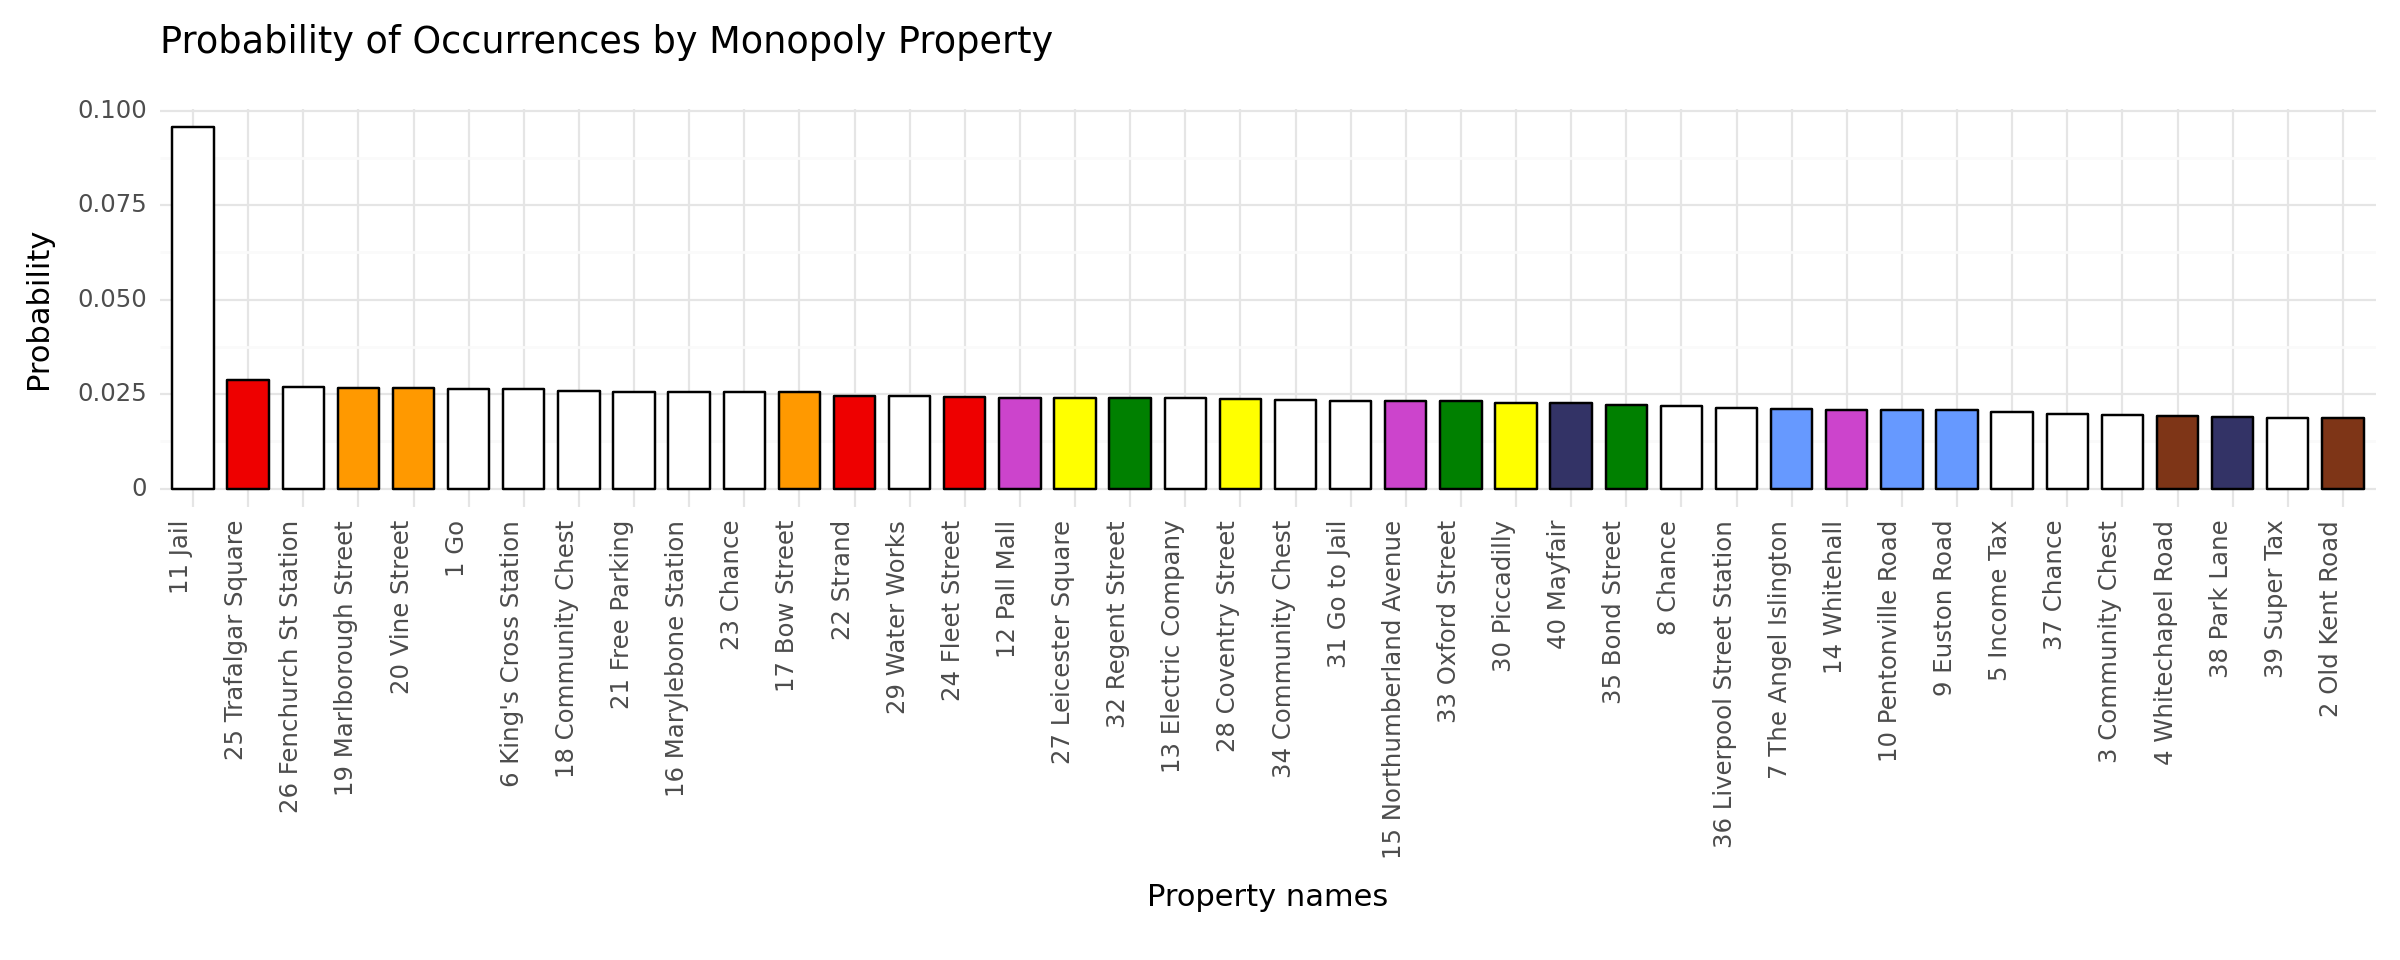

<Figure Size: (1200 x 480)>

In [ ]:
# Colors
col_property = {
    'white': '#FFFFFF', 'brown': '#7E3517', 'blue': '#6699FF', 'purple': '#CC44CC', 'orange': '#FF9900',
    'red': '#EE0000', 'yellow': '#FFFF00', 'green': '#008000', 'koamaru': '#333366'
}

# Data manipulation
df_simulation['Property Name Detail'] = (
    df_simulation['Space'].apply(lambda x: str(x)) + ' ' + df_simulation['Property Name']
)

# Map the colors
df_simulation['Color Detail'] = df_simulation['Color'].map(col_property)

# Data viz
plotnine.options.figure_size = (12, 4.8)
(
    ggplot(
        data = df_simulation
    )+
    geom_bar(
        aes(
            x = 'Property Name Detail',
            y = 'Probability'
        ),
        fill = df_simulation['Color Detail'],
        color = '#000000',
        width = 0.75,
        stat = 'identity'
    )+
    scale_x_discrete(
        limits = df_simulation['Property Name Detail'].tolist()
    )+
    labs(
        title = 'Probability of Occurrences by Monopoly Property'
    )+
    xlab(
        'Property names'
    )+
    ylab(
        'Probability'
    )+
    theme_minimal()+
    theme(
        axis_text_x = element_text(
            rotation = 90,
            hjust = 1
        )
    )
)

### 2 Probability of occurrences by monopoly property colors

In [ ]:
# Aggregate the data based on their colors
df_color = df_simulation.groupby(['Color', 'Color Detail']).agg(
    {
        'Occurrences':'sum',
    }
).reset_index(
).sort_values(
    by = [
        'Occurrences'
    ],
    ascending = False
).reset_index(
    drop = True
)

# Calculate the probability
df_color['Probability'] = (
    df_color['Occurrences'] / df_color['Occurrences'].sum()
)

# Rank
df_color['Rank'] = df_color['Probability'].rank(
    method = 'average',
    ascending = False
)

# Reorder columns
cols_reorder = ['Rank', 'Color', 'Occurrences', 'Probability', 'Color Detail']
df_color = df_color[cols_reorder]

In [ ]:
# Show the data
df_color.head(10)

,Rank,Color,Occurrences,Probability,Color Detail
0,1.0,white,63669,0.494282,#FFFFFF
1,2.0,orange,10136,0.078689,#FF9900
2,3.0,red,9989,0.077548,#EE0000
3,4.0,yellow,9077,0.070468,#FFFF00
4,5.0,green,8914,0.069202,#008000
5,6.0,purple,8748,0.067913,#CC44CC
6,7.0,blue,8062,0.062588,#6699FF
7,8.0,koamaru,5346,0.041503,#333366
8,9.0,brown,4870,0.037807,#7E3517


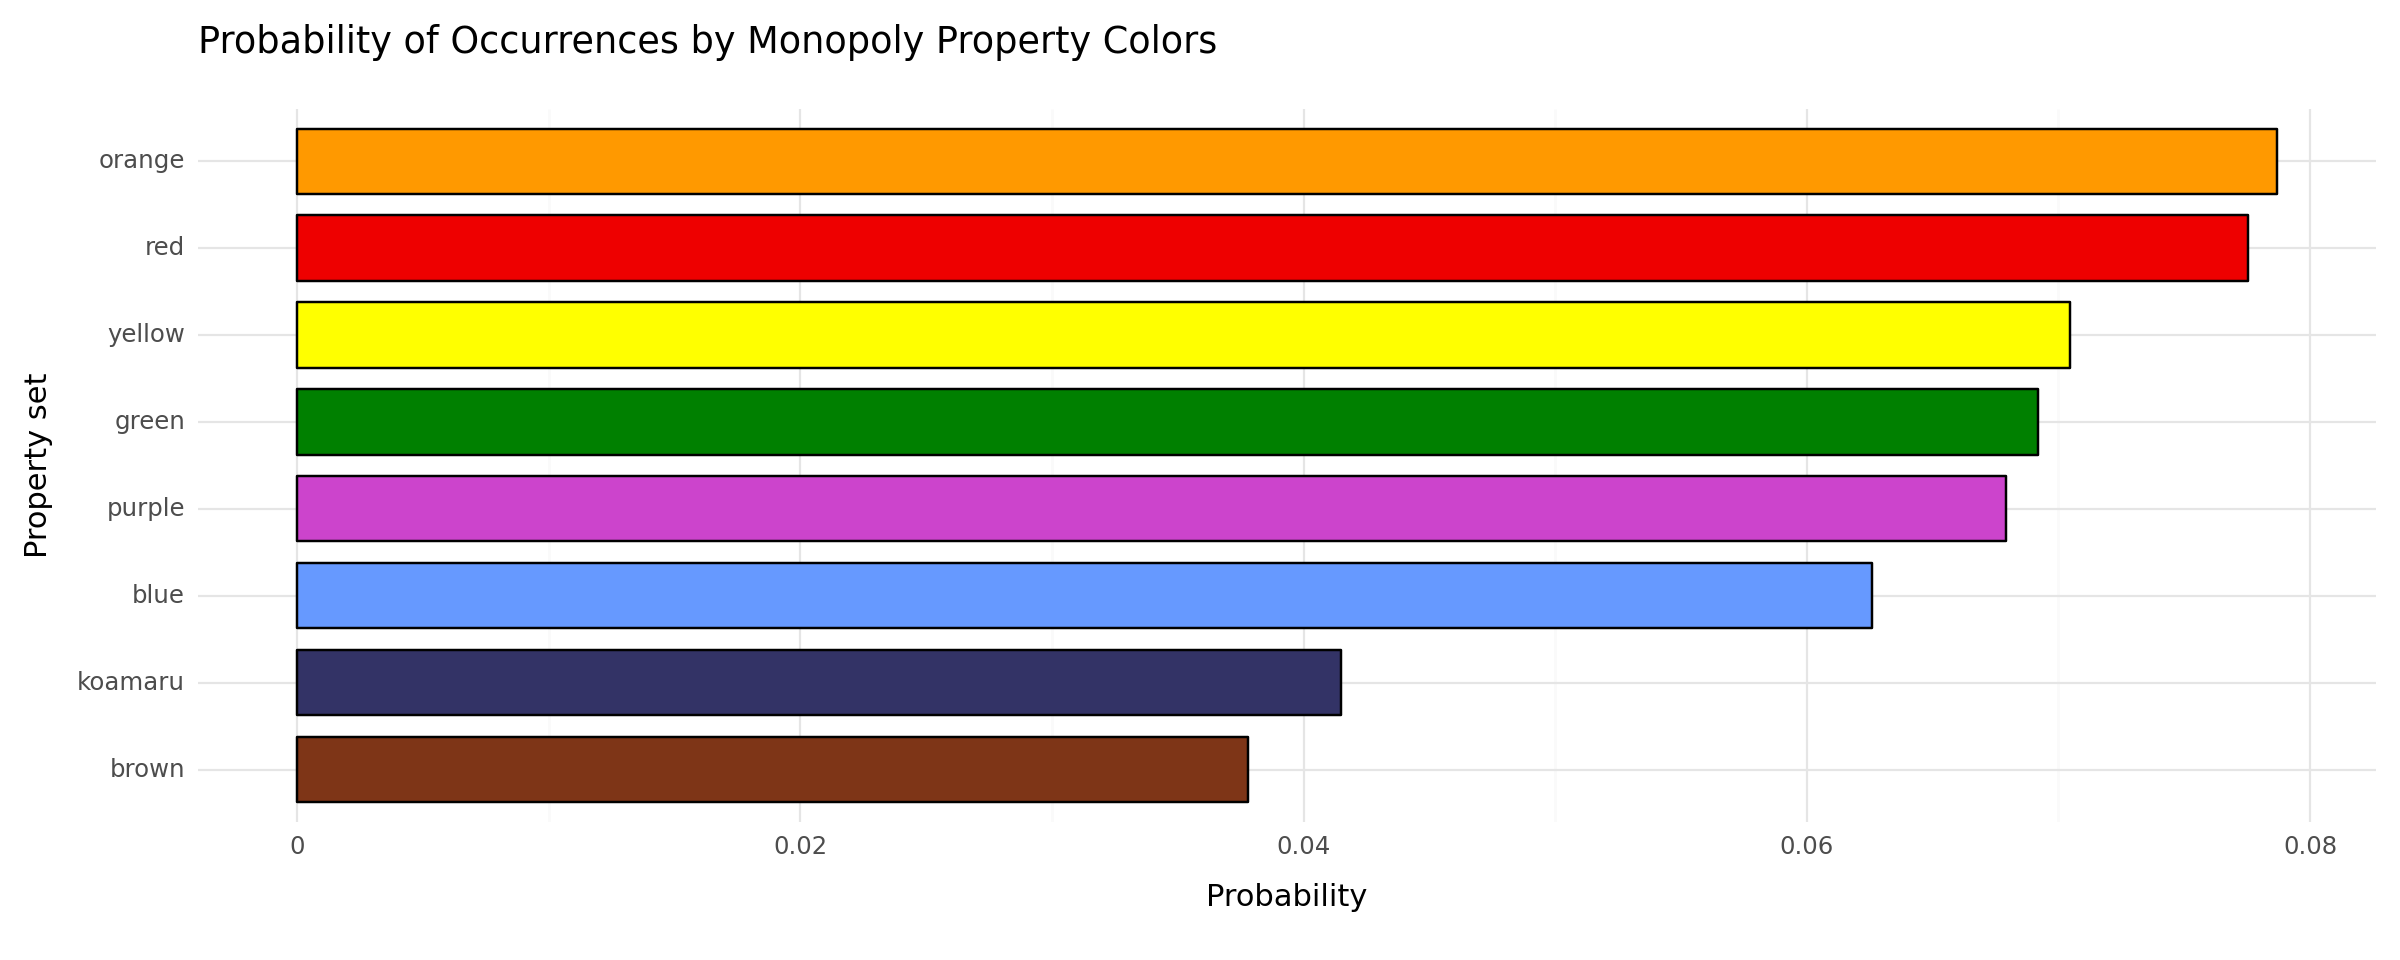

<Figure Size: (1200 x 480)>

In [ ]:
# Data manipulation
df_color_edited = df_color[df_color['Color'] != 'white']
df_color_edited = df_color_edited.reset_index(
).sort_values(
    by = [
        'Occurrences'
    ],
    ascending = True
)

# Data viz
plotnine.options.figure_size = (12, 4.8)
(
    ggplot(
        data = df_color_edited
    )+
    geom_bar(
        aes(
            x = 'Color',
            y = 'Probability'
        ),
        fill = df_color_edited['Color Detail'].tolist(),
        color = '#000000',
        width = 0.75,
        stat = 'identity'
    )+
    scale_x_discrete(
        limits = df_color_edited['Color'].tolist()
    )+
    labs(
        title = 'Probability of Occurrences by Monopoly Property Colors'
    )+
    xlab(
        'Property set'
    )+
    ylab(
        'Probability'
    )+
    coord_flip()+
    theme_minimal()
)

### 3 Expected income per opponent roll on all properties (roads)

In [ ]:
# Filter the spaces
dict_road = [d for d in data_space if d['space_type'] == 'road']

# Flatten the dictionary
obj_road = []
for elem in dict_road:
    flat = flatten_json(elem)
    obj_road.append(flat)

# Convert dictionary to data frame
data_road = pd.DataFrame(obj_road)

# Left-join with space data
data_road = data_road.merge(
    right = df_simulation[['Space', 'Probability']],
    how = 'left',
    left_on = 'order',
    right_on = 'Space'
)

# Filter and reorder columns
cols_order = [
    'order', 'name', 'color', 'Probability', 'money_amount', 'rent_alone', 'rent_monopoly',
    'rent_with_house_house_1', 'rent_with_house_house_2', 'rent_with_house_house_3',
    'rent_with_house_house_4', 'rent_with_house_hotel', 'prices_building_costs'
]
data_road = data_road[cols_order]

In [ ]:
# Show the data
data_road.head()

,order,name,color,Probability,money_amount,rent_alone,rent_monopoly,rent_with_house_house_1,rent_with_house_house_2,rent_with_house_house_3,rent_with_house_house_4,rent_with_house_hotel,prices_building_costs
0,2,Old Kent Road,brown,0.018647,60,2,4,10,30,90,160,250,50
1,4,Whitechapel Road,brown,0.019160,60,4,8,20,60,180,320,450,50
2,7,The Angel Islington,blue,0.021171,100,6,12,30,90,270,400,550,50
3,9,Euston Road,blue,0.020689,100,6,12,30,90,270,400,550,50
4,10,Pentonville Road,blue,0.020728,100,8,16,40,100,300,450,600,50


In [ ]:
# Expected income - single property
data_road['exp_income_alone'] = data_road['Probability'] * data_road['rent_alone']
# Expected income - one block property
data_road['exp_income_monopoly'] = data_road['Probability'] * data_road['rent_monopoly']
# Expected income - 1 house
data_road['exp_income_house_1'] = data_road['Probability'] * data_road['rent_with_house_house_1']
# Expected income - 2 house
data_road['exp_income_house_2'] = data_road['Probability'] * data_road['rent_with_house_house_2']
# Expected income - 3 house
data_road['exp_income_house_3'] = data_road['Probability'] * data_road['rent_with_house_house_3']
# Expected income - 4 house
data_road['exp_income_house_4'] = data_road['Probability'] * data_road['rent_with_house_house_4']
# Expected income - 1 hotel
data_road['exp_income_hotel'] = data_road['Probability'] * data_road['rent_with_house_hotel']

In [ ]:
# Filter columns
cols_show = [
    'name', 'color',
    'exp_income_alone', 'exp_income_monopoly', 'exp_income_house_1',
    'exp_income_house_2', 'exp_income_house_3', 'exp_income_house_4', 'exp_income_hotel'
]
data_road_income = data_road[cols_show]

In [ ]:
# Show the data
data_road_income.style.background_gradient(cmap = 'Greens')

,name,color,exp_income_alone,exp_income_monopoly,exp_income_house_1,exp_income_house_2,exp_income_house_3,exp_income_house_4,exp_income_hotel
0,Old Kent Road,brown,0.037295,0.074590,0.186475,0.559424,1.678273,2.983596,4.661869
1,Whitechapel Road,brown,0.076639,0.153279,0.383197,1.149591,3.448774,6.131153,8.621934
2,The Angel Islington,blue,0.127023,0.254047,0.635117,1.905350,5.716049,8.468221,11.643804
3,Euston Road,blue,0.124135,0.248271,0.620677,1.862030,5.586091,8.275691,11.379075
4,Pentonville Road,blue,0.165824,0.331649,0.829122,2.072804,6.218413,9.327620,12.436826
5,Pall Mall,purple,0.240507,0.481015,1.202537,3.607611,10.822833,15.031713,18.038056
6,Whitehall,purple,0.207669,0.415337,1.038343,3.115029,9.345087,12.979287,15.575145
7,Northumberland Avenue,purple,0.277150,0.554300,1.385751,4.157254,11.547927,16.167098,20.786268
8,Bow Street,orange,0.355948,0.711896,1.779739,5.084969,13.983666,19.068635,24.153605
9,Marlborough Street,orange,0.373990,0.747980,1.869949,5.342711,14.692456,20.035168,25.377879


In [ ]:
# Aggregate the data based on their colors
agg_road_income = data_road_income.groupby(['color']).agg(
    {
        'exp_income_monopoly': 'sum',
        'exp_income_house_1': 'sum',
        'exp_income_house_2': 'sum',
        'exp_income_house_3': 'sum',
        'exp_income_house_4': 'sum',
        'exp_income_hotel': 'sum'
    }
).reset_index(
).sort_values(
    by = [
        'exp_income_monopoly'
    ],
    ascending = True
).reset_index(
    drop = True
)

In [ ]:
# Show the data
agg_road_income.style.background_gradient(cmap = 'Blues')

,color,exp_income_monopoly,exp_income_house_1,exp_income_house_2,exp_income_house_3,exp_income_house_4,exp_income_hotel
0,brown,0.227869,0.569672,1.709016,5.127047,9.114750,13.283803
1,blue,0.833966,2.084915,5.840184,17.520553,26.071531,35.459705
2,purple,1.450653,3.626631,10.879894,31.715847,44.178098,54.399469
3,orange,2.309492,5.773731,16.268797,44.606439,60.344225,76.082012
4,red,2.809015,7.022537,20.092228,53.276894,67.459107,81.641319
5,yellow,3.191373,7.978434,23.935301,57.509064,69.840891,82.172718
6,koamaru,3.584787,7.829300,23.016668,52.448937,63.014805,73.580672
7,green,3.687325,9.440343,28.321028,64.502255,78.342688,91.008144


In [ ]:
# Reshape the data (wide to long format)
long_road_income = pd.melt(
    frame = agg_road_income,
    id_vars = ['color'],
    var_name = ['property'],
    value_name = 'value'
)

In [ ]:
# Show the data
long_road_income.head()

,color,property,value
0,brown,exp_income_monopoly,0.227869
1,blue,exp_income_monopoly,0.833966
2,purple,exp_income_monopoly,1.450653
3,orange,exp_income_monopoly,2.309492
4,red,exp_income_monopoly,2.809015


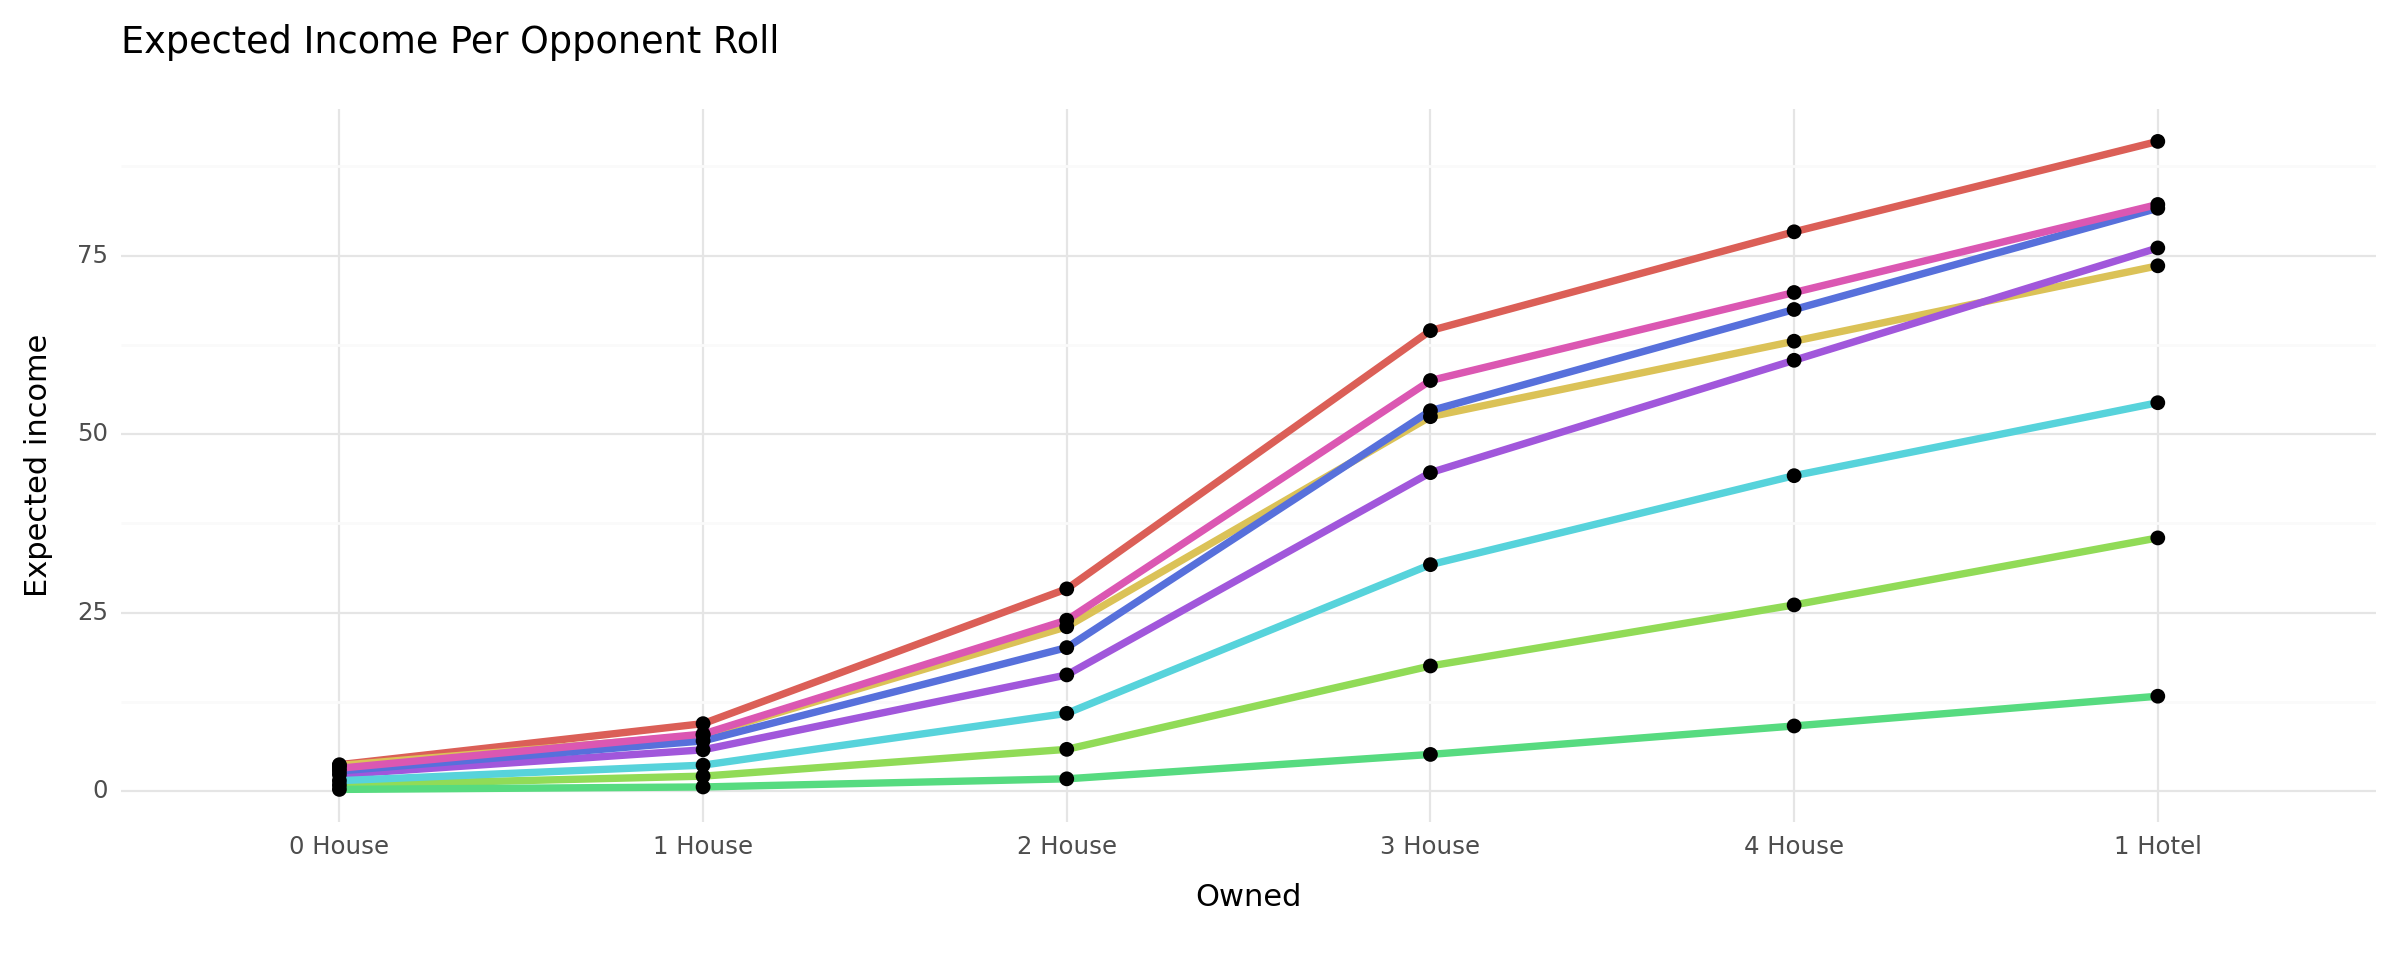

<Figure Size: (1200 x 480)>

In [ ]:
# Horizontal axis labels
labels = [
    'exp_income_monopoly', 'exp_income_house_1', 'exp_income_house_2',
    'exp_income_house_3', 'exp_income_house_4', 'exp_income_hotel'
]

# Colors
col_property = {
    'white': '#FFFFFF', 'brown': '#7E3517', 'blue': '#6699FF', 'purple': '#CC44CC', 'orange': '#FF9900',
    'red': '#EE0000', 'yellow': '#FFFF00', 'green': '#008000', 'koamaru': '#333366'
}

# Map the colors
long_road_income['color_detail'] = long_road_income['color'].map(col_property)

# Create a time series plot
(
    ggplot(
        data = long_road_income
    )+
    geom_line(
        aes(
            x = 'property',
            y = 'value',
            group = 'color',
            color = 'color_detail'
        ),
        size = 1.5,
        show_legend = False
    )+
    geom_point(aes(x = 'property',
                   y = 'value',
                   group = 'color'),
               size = 2,
               color = '#000000')+
    scale_x_discrete(
        limits = labels,
        labels = [
            '0 House', '1 House', '2 House', '3 House', '4 House', '1 Hotel'
        ]
    )+
    labs(
        title = 'Expected Income Per Opponent Roll'
    )+
    xlab(
        'Owned'
    )+
    ylab(
        'Expected income'
    )+
    theme_minimal()
)

### 4 Expected income per opponent roll on all properties (railroads)

In [ ]:
# Filter the spaces
dict_railroad = [d for d in data_space if d['space_type'] == 'railroad']

# Flatten the dictionary
obj_railroad = []
for elem in dict_railroad:
    flat = flatten_json(elem)
    obj_railroad.append(flat)

# Convert dictionary to data frame
data_railroad = pd.DataFrame(obj_railroad)

# Left-join with space data
data_railroad = data_railroad.merge(
    right = df_simulation[['Space', 'Probability']],
    how = 'left',
    left_on = 'order',
    right_on = 'Space'
)

# Filter and reorder columns
cols_order = [
    'order', 'name', 'color', 'Probability', 'money_amount',
    'rent_owned_1', 'rent_owned_2', 'rent_owned_3', 'rent_owned_4'
]
data_railroad = data_railroad[cols_order]

In [ ]:
# Show the data
data_railroad.head()

,order,name,color,Probability,money_amount,rent_owned_1,rent_owned_2,rent_owned_3,rent_owned_4
0,6,King's Cross Station,white,0.026419,200,25,50,100,200
1,16,Marylebone Station,white,0.025588,200,25,50,100,200
2,26,Fenchurch St Station,white,0.026884,200,25,50,100,200
3,36,Liverpool Street Station,white,0.021450,200,25,50,100,200


In [ ]:
# Expected income - own 1 property
data_railroad['exp_income_owned_1'] = data_railroad['Probability'] * data_railroad['rent_owned_1']
# Expected income - own 2 property
data_railroad['exp_income_owned_2'] = data_railroad['Probability'] * data_railroad['rent_owned_2']
# Expected income - own 3 property
data_railroad['exp_income_owned_3'] = data_railroad['Probability'] * data_railroad['rent_owned_3']
# Expected income - own 4 property
data_railroad['exp_income_owned_4'] = data_railroad['Probability'] * data_railroad['rent_owned_4']

In [ ]:
# Show the data
data_railroad.head()

,order,name,color,Probability,money_amount,rent_owned_1,rent_owned_2,rent_owned_3,rent_owned_4,exp_income_owned_1,exp_income_owned_2,exp_income_owned_3,exp_income_owned_4
0,6,King's Cross Station,white,0.026419,200,25,50,100,200,0.660464,1.320928,2.641855,5.283710
1,16,Marylebone Station,white,0.025588,200,25,50,100,200,0.639697,1.279394,2.558788,5.117575
2,26,Fenchurch St Station,white,0.026884,200,25,50,100,200,0.672109,1.344217,2.688435,5.376870
3,36,Liverpool Street Station,white,0.021450,200,25,50,100,200,0.536251,1.072502,2.145003,4.290006


In [ ]:
# Filter columns
cols_show = [
    'name', 'exp_income_owned_1', 'exp_income_owned_2',
    'exp_income_owned_3','exp_income_owned_4'
]
data_railroad_income = data_railroad[cols_show]

In [ ]:
# Show the data
data_railroad_income

,name,exp_income_owned_1,exp_income_owned_2,exp_income_owned_3,exp_income_owned_4
0,King's Cross Station,0.660464,1.320928,2.641855,5.283710
1,Marylebone Station,0.639697,1.279394,2.558788,5.117575
2,Fenchurch St Station,0.672109,1.344217,2.688435,5.376870
3,Liverpool Street Station,0.536251,1.072502,2.145003,4.290006


### 5 Expected income per opponent roll on all properties (utility)

In [ ]:
# Filter the spaces
dict_utility = [d for d in data_space if d['space_type'] == 'utility']

# Flatten the dictionary
obj_utility = []
for elem in dict_utility:
    flat = flatten_json(elem)
    obj_utility.append(flat)

# Convert dictionary to data frame
data_utility = pd.DataFrame(obj_utility)

# Left-join with space data
data_utility = data_utility.merge(
    right = df_simulation[['Space', 'Probability']],
    how = 'left',
    left_on = 'order',
    right_on = 'Space'
)

# Filter and reorder columns
cols_order = [
    'order', 'name', 'color', 'Probability',
    'money_amount', 'rent_owned_1', 'rent_owned_2'
]
data_utility = data_utility[cols_order]

# Rent cost if dices = 7
data_utility['rent_owned_1'] = data_utility['rent_owned_1'] * 7
data_utility['rent_owned_2'] = data_utility['rent_owned_2'] * 7

In [ ]:
# Show the data
data_utility.head()

,order,name,color,Probability,money_amount,rent_owned_1,rent_owned_2
0,13,Electric Company,white,0.023911,150,28,70
1,29,Water Works,white,0.024408,150,28,70


In [ ]:
# Expected income - own 1 property
data_utility['exp_income_owned_1'] = data_utility['Probability'] * data_utility['rent_owned_1']
# Expected income - own 2 property
data_utility['exp_income_owned_2'] = data_utility['Probability'] * data_utility['rent_owned_2']

In [ ]:
# Show the data
data_utility.head()

,order,name,color,Probability,money_amount,rent_owned_1,rent_owned_2,exp_income_owned_1,exp_income_owned_2
0,13,Electric Company,white,0.023911,150,28,70,0.669508,1.67377
1,29,Water Works,white,0.024408,150,28,70,0.683420,1.70855


In [ ]:
# Filter columns
cols_show = [
    'name', 'exp_income_owned_1', 'exp_income_owned_2',
]
data_utility_income = data_utility[cols_show]

In [ ]:
# Show the data
data_utility_income

,name,exp_income_owned_1,exp_income_owned_2
0,Electric Company,0.669508,1.67377
1,Water Works,0.683420,1.70855


### 6 Expected number of opponent rolls to recoup incremental cost

#### 6.1 Roads

In [ ]:
# Expected number of opponent rolls - single property
data_road['exp_rolls_alone'] = data_road['money_amount'] / data_road['exp_income_alone']
# Expected number of opponent rolls - one block property
data_road['exp_rolls_monopoly'] = data_road['money_amount'] / data_road['exp_income_monopoly']
# Expected number of opponent rolls - 1 house
data_road['exp_rolls_house_1'] = (data_road['money_amount'] + (1 * data_road['prices_building_costs'])) / data_road['exp_income_house_1']
# Expected number of opponent rolls - 2 house
data_road['exp_rolls_house_2'] = (data_road['money_amount'] + (2 * data_road['prices_building_costs'])) / data_road['exp_income_house_2']
# Expected number of opponent rolls - 3 house
data_road['exp_rolls_house_3'] = (data_road['money_amount'] + (3 * data_road['prices_building_costs'])) / data_road['exp_income_house_3']
# Expected number of opponent rolls - 4 house
data_road['exp_rolls_house_4'] = (data_road['money_amount'] + (4 * data_road['prices_building_costs'])) / data_road['exp_income_house_4']
# Expected number of opponent rolls - 1 hotel
data_road['exp_rolls_hotel'] = (data_road['money_amount'] + (5 * data_road['prices_building_costs'])) / data_road['exp_income_hotel']

# Filter columns
cols_show = [
    'name', 'color',
    'exp_rolls_alone', 'exp_rolls_monopoly', 'exp_rolls_house_1',
    'exp_rolls_house_2', 'exp_rolls_house_3', 'exp_rolls_house_4', 'exp_rolls_hotel'
]
data_road_roll = data_road[cols_show]

# Aggregate the data based on their colors
agg_road_roll = data_road_roll.groupby(['color']).agg(
    {
        'exp_rolls_monopoly': 'mean',
        'exp_rolls_house_1': 'mean',
        'exp_rolls_house_2': 'mean',
        'exp_rolls_house_3': 'mean',
        'exp_rolls_house_4': 'mean',
        'exp_rolls_hotel': 'mean'
    }
).reset_index(
).sort_values(
    by = [
        'exp_rolls_monopoly'
    ],
    ascending = True
).reset_index(
    drop = True
)

In [ ]:
# Show the data
agg_road_roll.style.background_gradient(cmap = 'Blues')

,color,exp_rolls_monopoly,exp_rolls_house_1,exp_rolls_house_2,exp_rolls_house_3,exp_rolls_house_4,exp_rolls_hotel
0,koamaru,220.917949,149.583297,69.218291,38.674519,39.045534,39.323795
1,orange,242.964838,149.434416,71.445015,32.794095,29.204521,27.104320
2,red,246.985821,156.055395,75.386244,35.591019,33.929607,32.903211
3,green,249.507687,161.191165,74.955647,42.189944,42.390117,43.089530
4,yellow,250.602087,156.660130,71.026475,37.384492,37.228186,37.119397
5,purple,305.592979,206.113137,96.663027,42.524114,37.389017,36.107795
6,blue,365.979507,219.587704,102.954960,42.897900,34.613288,29.653116
7,brown,597.920947,438.475361,212.594115,93.009925,64.774769,51.225872


#### 6.2 Railroads

In [ ]:
# Expected number of opponent rolls - 1 house
data_railroad['exp_rolls_house_1'] = data_railroad['money_amount'] / data_railroad['exp_income_owned_1']
# Expected number of opponent rolls - 2 house
data_railroad['exp_rolls_house_2'] = data_railroad['money_amount'] / data_railroad['exp_income_owned_2']
# Expected number of opponent rolls - 3 house
data_railroad['exp_rolls_house_3'] = data_railroad['money_amount'] / data_railroad['exp_income_owned_3']
# Expected number of opponent rolls - 4 house
data_railroad['exp_rolls_house_4'] = data_railroad['money_amount'] / data_railroad['exp_income_owned_4']

# Filter columns
cols_show = [
    'name', 'color', 'exp_rolls_house_1', 'exp_rolls_house_2',
    'exp_rolls_house_3', 'exp_rolls_house_4'
]
data_railroad_roll = data_railroad[cols_show]

# Aggregate the data based on their colors
agg_railroad_roll = data_railroad_roll.groupby(['color']).agg(
    {
        'exp_rolls_house_1': 'mean',
        'exp_rolls_house_2': 'mean',
        'exp_rolls_house_3': 'mean',
        'exp_rolls_house_4': 'mean'
    }
).reset_index(
).sort_values(
    by = [
        'exp_rolls_house_1'
    ],
    ascending = True
).reset_index(
    drop = True
)

# Update value in 'color'
agg_railroad_roll.loc[0, 'color'] = 'railroad'

In [ ]:
# Show the data
agg_railroad_roll.style.background_gradient(cmap = 'Blues')

,color,exp_rolls_house_1,exp_rolls_house_2,exp_rolls_house_3,exp_rolls_house_4
0,railroad,321.499073,160.749536,80.374768,40.187384


#### 6.3 Utility

In [ ]:
# Expected number of opponent rolls - own 1 property
data_utility['exp_rolls_house_1'] = data_utility['money_amount'] / data_utility['exp_income_owned_1']
# Expected number of opponent rolls - own 2 property
data_utility['exp_rolls_house_2'] = data_utility['money_amount'] / data_utility['exp_income_owned_2']

# Filter columns
cols_show = [
    'name', 'color', 'exp_rolls_house_1', 'exp_rolls_house_2'
]
data_utility_roll = data_utility[cols_show]

# Aggregate the data based on their colors
agg_utility_roll = data_utility_roll.groupby(['color']).agg(
    {
        'exp_rolls_house_1': 'mean',
        'exp_rolls_house_2': 'mean',
    }
).reset_index(
).sort_values(
    by = [
        'exp_rolls_house_1'
    ],
    ascending = True
).reset_index(
    drop = True
)

# Update value in 'color'
agg_utility_roll.loc[0, 'color'] = 'utility'

In [ ]:
# Show the data
agg_utility_roll.style.background_gradient(cmap = 'Blues')

,color,exp_rolls_house_1,exp_rolls_house_2
0,utility,221.764749,88.705900


#### 6.4 Concatenate the data

In [ ]:
# Concatenate the data
agg_property_roll = pd.concat(
    objs = [agg_road_roll, agg_railroad_roll, agg_utility_roll],
    ignore_index = True
).sort_values(
    by = [
        'exp_rolls_monopoly'
    ],
    ascending = False
).reset_index(
    drop = True
).fillna(
    value = 0
)

In [ ]:
# Show the data
agg_property_roll.style.background_gradient(cmap = 'Blues')

,color,exp_rolls_monopoly,exp_rolls_house_1,exp_rolls_house_2,exp_rolls_house_3,exp_rolls_house_4,exp_rolls_hotel
0,brown,597.920947,438.475361,212.594115,93.009925,64.774769,51.225872
1,blue,365.979507,219.587704,102.954960,42.897900,34.613288,29.653116
2,purple,305.592979,206.113137,96.663027,42.524114,37.389017,36.107795
3,yellow,250.602087,156.660130,71.026475,37.384492,37.228186,37.119397
4,green,249.507687,161.191165,74.955647,42.189944,42.390117,43.089530
5,red,246.985821,156.055395,75.386244,35.591019,33.929607,32.903211
6,orange,242.964838,149.434416,71.445015,32.794095,29.204521,27.104320
7,koamaru,220.917949,149.583297,69.218291,38.674519,39.045534,39.323795
8,railroad,0.000000,321.499073,160.749536,80.374768,40.187384,0.000000
9,utility,0.000000,221.764749,88.705900,0.000000,0.000000,0.000000


In [ ]:
# Reshape the data (wide to long format)
long_property_roll = pd.melt(
    frame = agg_property_roll,
    id_vars = ['color'],
    var_name = ['property'],
    value_name = 'value'
)

In [ ]:
# Show the data
long_property_roll.head()

,color,property,value
0,brown,exp_rolls_monopoly,597.920947
1,blue,exp_rolls_monopoly,365.979507
2,purple,exp_rolls_monopoly,305.592979
3,yellow,exp_rolls_monopoly,250.602087
4,green,exp_rolls_monopoly,249.507687


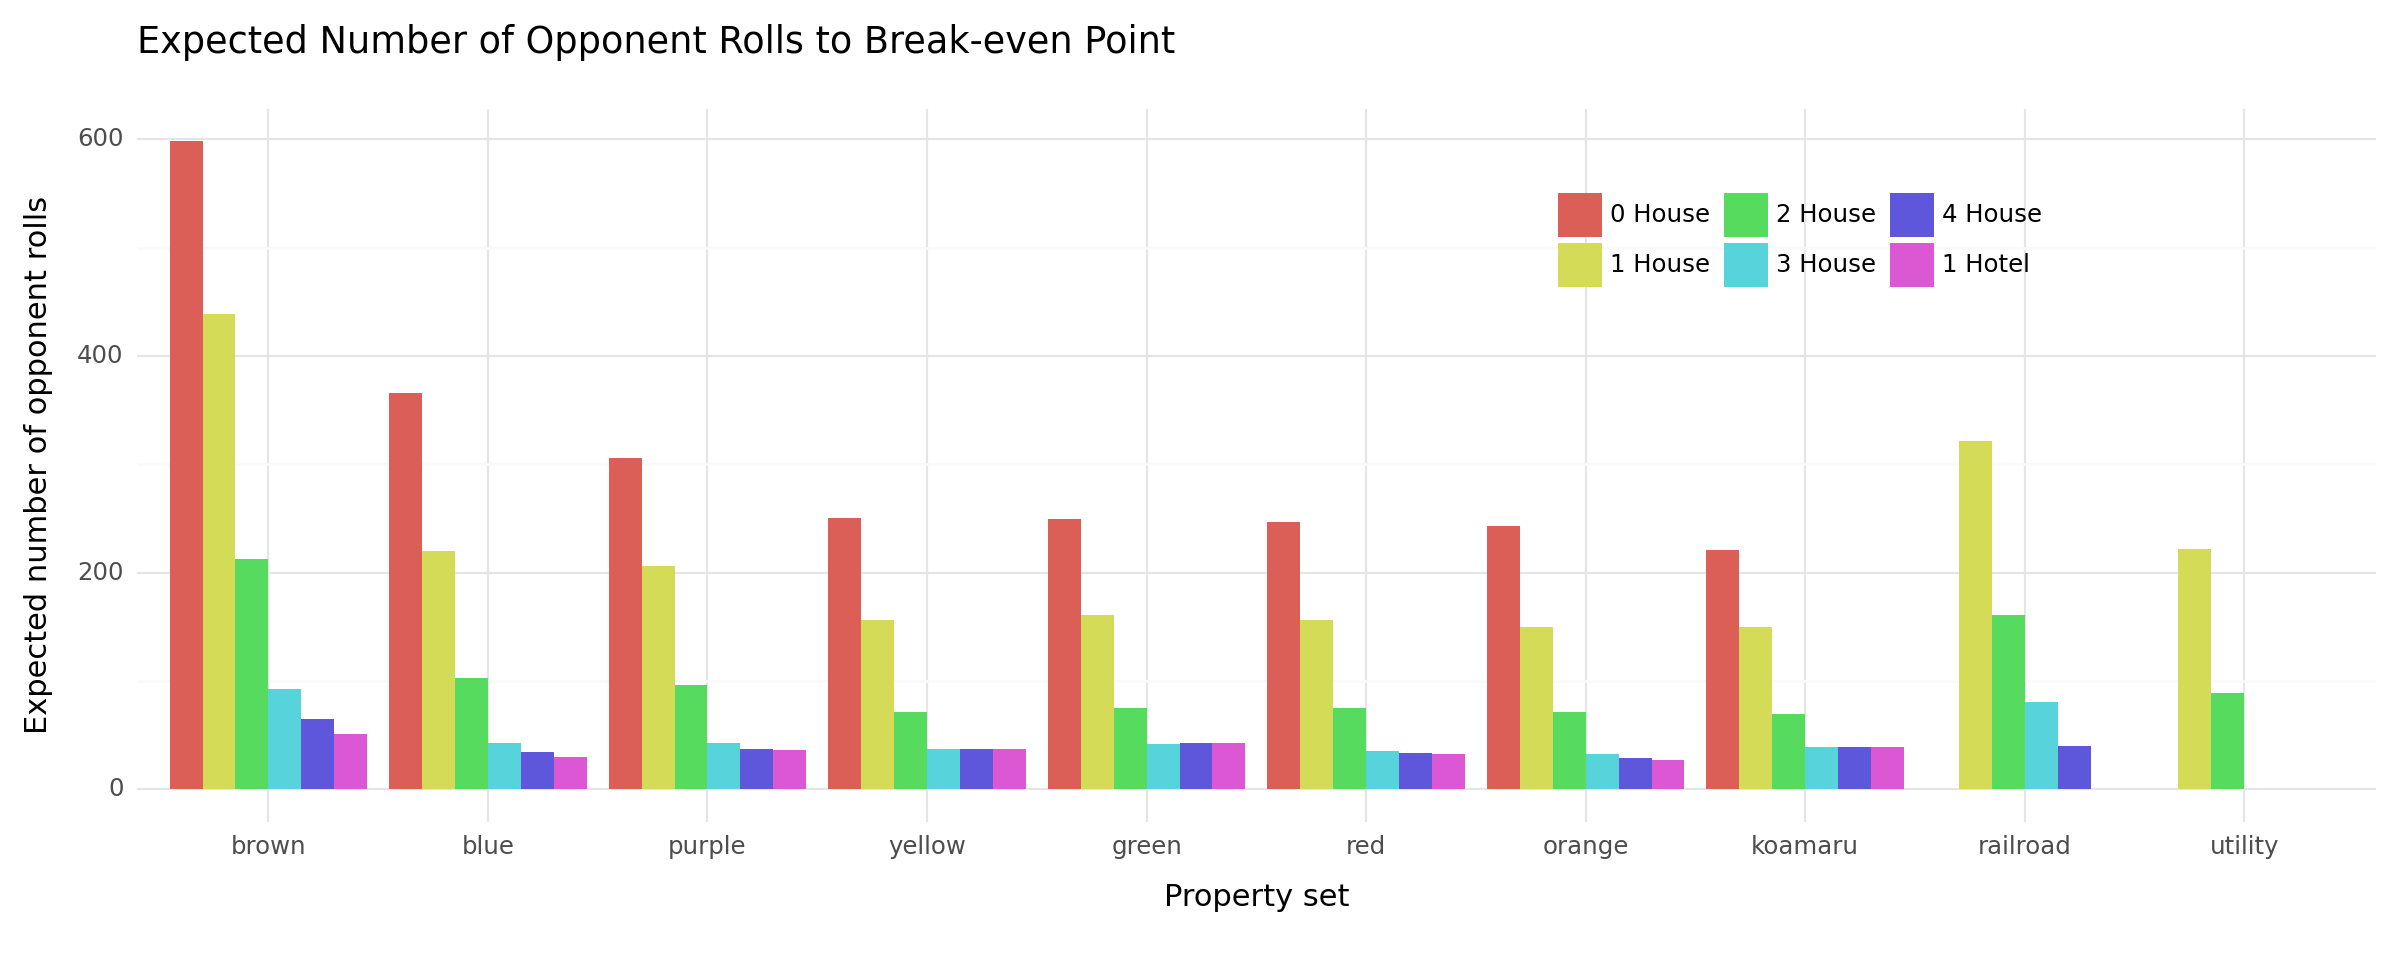

<Figure Size: (1200 x 480)>

In [ ]:
# Reorder the column bar
long_property_roll['property'] = long_property_roll['property'].astype('category')
long_property_roll['property'] = long_property_roll['property'].cat.reorder_categories(
    [
        'exp_rolls_monopoly', 'exp_rolls_house_1', 'exp_rolls_house_2',
        'exp_rolls_house_3', 'exp_rolls_house_4', 'exp_rolls_hotel'
    ]
)

# 
# Colors
name_property = {
    'exp_rolls_monopoly': '0 House', 'exp_rolls_house_1': '1 House', 'exp_rolls_house_2': '2 House',
    'exp_rolls_house_3': '3 House', 'exp_rolls_house_4': '4 House', 'exp_rolls_hotel': '1 Hotel'
}

# Map the colors
long_property_roll['property'] = long_property_roll['property'].map(name_property)

# Create a time series plot
(
    ggplot(
        data = long_property_roll
    )+
    geom_bar(
        aes(
            x = 'color',
            y = 'value',
            fill = 'property'
        ),
        stat = 'identity',
        position = position_dodge()
    )+
    scale_x_discrete(
        limits = long_property_roll['color'].unique()
    )+
    labs(
        title = 'Expected Number of Opponent Rolls to Break-even Point'
    )+
    xlab(
        'Property set'
    )+
    ylab(
        'Expected number of opponent rolls'
    )+
    theme_minimal(
    )+
    theme(
        legend_title = element_blank(),
        legend_position = (0.75, 0.75),
        legend_direction = 'horizontal'
    )
)